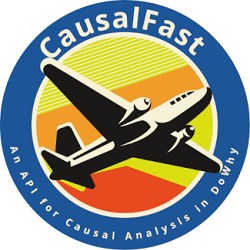
<h3>Causal DAG and CausalModel Maker</h3><br>
Use this notebook to build Directed Acyclic Graphs (DAGs) for use in DoWhy<br>

***cf.makegraph() has 3 primary functions***
 1.  Make a Causal Graph DAG<br>
 2.  Make Causal Model for DoWhy/Simulator<br>
 3.  Run Tutorials of DoWhy Estimand: Frontdoor, Backdoor, Instrumental Variable (IV)

In [1]:
#!pip install -i https://test.pypi.org/simple/ causalfast
import causalfast as cf
import pandas as pd
cf.__version__
#cf.makegraph()  #Run this for assistance

'0.2.5'

<h3>Step 1: Practice Making Causal DAGs</h3>

CausalFast makegraph() Causal Graph Maker

____________________________________________
Note: Please ensure your variable names precisely match the column names in your causal data.
Note: If the variable names and column names in the causal data do not match, DoWhy will be unable to create an estimate.
Note: The following string can be accepted by the DoWhy CausalModel object 'graph=' arguement

Edges List: 
[('Competitiveness_of_the_tournament', 'Entry_decision'), ('Prestige_of_the_tournament', 'Competitiveness_of_the_tournament'), ('Prestige_of_the_tournament', 'Entry_decision'), ('Prize', 'Competitiveness_of_the_tournament'), ('Ability_of_the_player', 'Fully_exempt_next_season'), ('Ability_of_the_player', 'Injuries'), ('Ability_of_the_player', 'Cumulative_career_money'), ('Ability_of_the_player', 'Distance_losing_card'), ('Ability_of_the_player', 'Entry_decision'), ('Prize', 'Entry_decision'), ('Cumulative_career_money', 'Entry_decision'), ('Injuries', 'Entry_decision'), ('Weather',

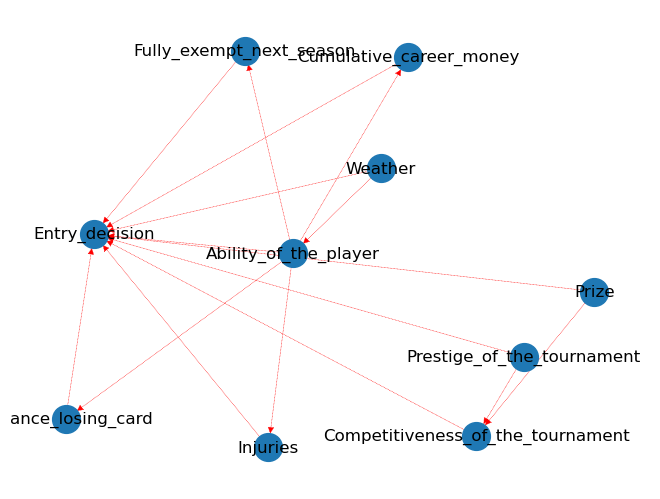

In [2]:
edgelist = [('Competitiveness_of_the_tournament', "Entry_decision"), 
            ('Prestige_of_the_tournament', "Competitiveness_of_the_tournament"),
            ('Prestige_of_the_tournament', 'Entry_decision'),
            ('Prize', "Competitiveness_of_the_tournament"), 
            ("Ability_of_the_player", "Fully_exempt_next_season"), 
            ('Ability_of_the_player', "Injuries"), 
            ("Ability_of_the_player", 'Cumulative_career_money'), 
            ('Ability_of_the_player', 'Distance_losing_card'), 
            ('Ability_of_the_player', 'Entry_decision'),
            ('Prize', 'Entry_decision'), 
            ('Cumulative_career_money', 'Entry_decision'),
            ('Injuries', 'Entry_decision'), 
            ('Weather', 'Entry_decision'), 
            ('Weather', 'Ability_of_the_player'), 
            ('Distance_losing_card', 'Entry_decision'), 
            ('Fully_exempt_next_season', 'Entry_decision')]
dag = cf.makegraph(function='graphmaker', edges=edgelist, eda=True)

<h3>Step 2: Use the Output from the DAG to make a DoWhy CausalModel</h3>

 1.  Load Dataset
 2.  Ensure Column Names identically match the names of all nodes in the DAG
 3.  Ensure the Treatment and Outcome variable named parameters in the function match the dataset/DAG

In [5]:
data2 = pd.read_csv('https://raw.githubusercontent.com/TejuOye/CausalFast/main/api/data/pga.csv')
digraph =  """digraph { }""" #PASTE THE """digraph { }""" HERE: load as a string into the model maker

CausalFast makegraph() Causal Model Maker:  Make a CausalModel Object (EDA Turned Off)

____________________________________________
Tool for Making Causal Models: Returns a CausalModel + Digraph + Data
Note: It is very important the column names in the dataset, the digraph variable names, and the treatment and outcome variable names all match precisely. If these do not match then DoWhy will be unable to generate a causal estiamte

Treatment:  Fully_exempt_next_season   (Verify your treatment parameter with the Digraph and Dataset column name)
Outcome:  Entry_decision   (Verify your outcome parameter with the Digraph and Dataset column name)

Graph String: 
digraph  {
Competitiveness_of_the_tournament;
Entry_decision;
Prestige_of_the_tournament;
Prize;
Ability_of_the_player;
Fully_exempt_next_season;
Injuries;
Cumulative_career_money;
Distance_losing_card;
Weather;
Competitiveness_of_the_tournament -> Entry_decision;
Prestige_of_the_tournament -> Competitiveness_of_the_tournament;
Pres

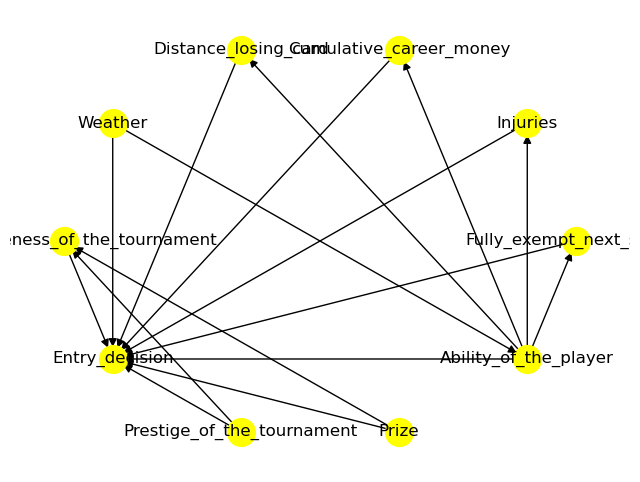

In [6]:
causalmodel = cf.makegraph(function='makecausalmodel',
                           eda=False,
                           graph=digraph,
                           dataset=data2,
                           treatment='Fully_exempt_next_season',
                           outcome='Entry_decision')

<h3>Step 3: Run CausalFast Simulator using the CausalModel Object</h3>

 1.  Load Causal model:   cf.simulator(causalmodel[0])<br>
 2.  Use default parameters or choose output, identifier, and estimator<br>
    - Note: If backdoor estimators are used for frontdoor or IV, the simulator will use defaults instead<br>
    - Note: Linear regression should only be used under OLS assumptions<br>
    - Note: Logistic regression (GLM and linearDRLearner) require a binary outcome variable<br>
    - Note: Propensity scores require both binary treatment and an observed common cause<br>

In [ ]:
#cf.simulator()  #Run this for assistance

In [ ]:
#cf.simulator(causalmodel[0],output='default',identifier='minimal-adjustment',estimator='backdoor.generalized_linear_model')
#cf.simulator(causalmodel[0],output='limited',identifier='maximal-adjustment',estimator='backdoor.generalized_linear_model')
#cf.simulator(causalmodel[0],output='full',identifier='exhaustive-search',estimator='backdoor.generalized_linear_model')